# Customer churn prediction: Telecom Churn Dataset

## Case Study 

Customer experience has become critical in every industry, including telecom, as customers demand and value excellent service and quality. Due to the high level of customer momentum and the increasing competition, telecom companies are facing greater difficulties. If they are not satisfied with the service received, telecom customers are keen to switch operators. Thus, telecom companies must constantly adjust their strategies to maintain customer loyalty and provide high quality service.

## The Aim 

Built a model to predict the customer's behavior and the possibility of them leaving the company. This information can be used to prevent customer churn.

### Features 
State: The state in which the customer lives.

Account length: The length of time the customer has been with the company.

Area code: The area code of the customer's phone number.

International plan: Whether or not the customer has an international calling plan.

Voice mail plan: Whether or not the customer has a voice mail plan.

Number vmail messages: The number of voice mail messages the customer has received.

Total day minutes: The total number of minutes the customer has used during the day.

Total day calls: The total number of calls the customer has made during the day.

Total day charge: The total amount of money the customer has spent during the day.

# 1. Prepare Problem

## a) Load libraries

In [120]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import sklearn.feature_selection as fs
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
from sklearn import tree
import numpy as np
from sklearn.metrics import accuracy_score

## b) Load Dataset

In [121]:
df = pd.read_csv("churn-bigml.csv")
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [122]:
print("Number of Rows: ",df.shape[0])
print("Number of Rows: ",df.shape[1])

Number of Rows:  2666
Number of Rows:  20


In [123]:
print("\n The Features are: ")
print(df.columns.tolist())


 The Features are: 
['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']


# 2. Summarize Data

##  a) Descriptive statistics

In [124]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## b) Data visualizations

In [125]:
import plotly.graph_objects as go
import plotly.offline as py


trace = go.Pie(labels = df["Churn"].value_counts().keys().tolist(),
               values = df["Churn"].value_counts().values.tolist(),
               marker = dict(colors = ['royalblue','lime'],
                             line = dict(color = "white", width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer churn in training data",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

# Prepare Data | Exploratory Data Analysis

## a) Data prepocession

In [126]:
# Check for missing values
print(df .isnull().sum())

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


In [127]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [128]:
from sklearn import preprocessing 
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()

le3 = preprocessing.LabelEncoder()
le4 = preprocessing.LabelEncoder()

In [129]:
labeling1=le1.fit_transform(df["State"])

labeling2=le2.fit_transform(df["Churn"])

labeling3=le2.fit_transform(df["International plan"])

labeling4=le2.fit_transform(df["Voice mail plan"])


In [130]:
df["State"] = labeling1
df["Churn"] = labeling2

df["International plan"] = labeling3
df["Voice mail plan"] = labeling4

In [131]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [132]:
# Get the number of unique values for each column
number_of_unique_values = {}
for column in df.columns:
  number_of_unique_values[column] = df[column].nunique()

# Print the number of unique values
for column, number_of_unique_values in number_of_unique_values.items():
  print(column, number_of_unique_values)

State 51
Account length 205
Area code 3
International plan 2
Voice mail plan 2
Number vmail messages 42
Total day minutes 1489
Total day calls 115
Total day charge 1489
Total eve minutes 1442
Total eve calls 120
Total eve charge 1301
Total night minutes 1444
Total night calls 118
Total night charge 885
Total intl minutes 158
Total intl calls 21
Total intl charge 158
Customer service calls 10
Churn 2


###### We have an imbalanced dataset, so we can oversample or undersample 

### Undersample

In [136]:
# Define the target variable
target = df["Churn"]

# Separate the data with target 0 from data with target with value 1
data_0 = df[target == 0]
data_1 = df[target == 1]

# Print the number of instances in each class
print("Number of instances with target 0:", len(data_0))
print("Number of instances with target 1:", len(data_1))

Number of instances with target 0: 2278
Number of instances with target 1: 388


In [138]:
data_00 = data_0[:388]
len(data_00)

388

In [172]:
# Combine the data
df = pd.concat([data_00, data_1])

In [173]:
import plotly.graph_objects as go
import plotly.offline as py


trace = go.Pie(labels = df["Churn"].value_counts().keys().tolist(),
               values = df["Churn"].value_counts().values.tolist(),
               marker = dict(colors = ['royalblue','lime'],
                             line = dict(color = "white", width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer churn in training data",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

## b) Feature Selection

In [141]:
tree_clf = tree.DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(df.drop('Churn', axis=1) , df['Churn'])

DecisionTreeClassifier(max_depth=5, random_state=42)

In [142]:
for i in zip(df, tree_clf.feature_importances_):
    print(i)

('State', 0.0)
('Account length', 0.0)
('Area code', 0.0)
('International plan', 0.22044762251618238)
('Voice mail plan', 0.0)
('Number vmail messages', 0.06580791093094238)
('Total day minutes', 0.17339698843461313)
('Total day calls', 0.022798424349169358)
('Total day charge', 0.06053633895223405)
('Total eve minutes', 0.014555089745788953)
('Total eve calls', 0.0)
('Total eve charge', 0.06817066689148457)
('Total night minutes', 0.0)
('Total night calls', 0.0)
('Total night charge', 0.009166949975000355)
('Total intl minutes', 0.03419349328162818)
('Total intl calls', 0.09884829182708013)
('Total intl charge', 0.01375118601676836)
('Customer service calls', 0.21832703707910803)


In [143]:
#Split features from la('International plan', 0.10799927729500113)

features= df[['International plan', 'Total day minutes', 'Total intl minutes', 'Customer service calls']]

label = df['Churn'] 

features

,International plan,Total day minutes,Total intl minutes,Customer service calls
0,0,265.1,10.0,1
1,0,161.6,13.7,1
2,0,243.4,12.2,0
3,1,299.4,6.6,2
4,1,166.7,10.1,3
...,...,...,...,...
2631,1,172.1,13.9,1
2641,1,186.1,13.8,4
2656,1,140.0,9.7,4
2657,0,321.1,11.5,4


# Model Building

In [144]:
train_x,test_x,train_y,test_y=train_test_split(features,label,test_size=0.3)
print(df.shape, train_x.shape, test_x.shape)

(776, 20) (543, 4) (233, 4)


### Normalization

In [145]:
scaler = MinMaxScaler()

In [146]:
scaler.fit(features)

MinMaxScaler()

In [147]:
X_train_reduced=scaler.transform(train_x)
X_train_reduced

array([[0.        , 0.94013683, 0.53      , 0.        ],
       [0.        , 0.57411631, 0.645     , 0.22222222],
       [1.        , 0.7790764 , 0.6       , 0.11111111],
       ...,
       [1.        , 0.35490308, 0.57      , 0.22222222],
       [1.        , 0.67645382, 0.71      , 0.        ],
       [0.        , 0.86630559, 0.29      , 0.11111111]])

In [148]:
X_test_reduced=scaler.transform(test_x)
X_test_reduced

array([[1.        , 0.76510832, 0.485     , 0.22222222],
       [1.        , 0.65820981, 0.55      , 0.        ],
       [0.        , 0.50085519, 0.46      , 0.55555556],
       [0.        , 0.62143672, 0.32      , 0.33333333],
       [0.        , 0.64395667, 0.715     , 0.33333333],
       [0.        , 0.9159065 , 0.4       , 0.11111111],
       [0.        , 0.69925884, 0.535     , 0.33333333],
       [0.        , 0.44783352, 0.425     , 0.44444444],
       [1.        , 0.55359179, 0.645     , 0.11111111],
       [0.        , 0.71664766, 0.375     , 0.11111111],
       [0.        , 0.77280502, 0.42      , 0.11111111],
       [0.        , 0.70553022, 0.51      , 0.22222222],
       [0.        , 0.46607754, 0.39      , 0.22222222],
       [1.        , 0.88939567, 0.525     , 0.        ],
       [0.        , 0.84064994, 0.66      , 0.11111111],
       [0.        , 0.52223489, 0.56      , 0.11111111],
       [0.        , 0.48717218, 0.58      , 0.11111111],
       [0.        , 0.73118586,

In [149]:
label.unique()

array([0, 1], dtype=int64)

# Algorithem antuny

In [150]:
def best_param(model, parameter):
  grid_search=GridSearchCV(model,parameter,scoring='accuracy',cv=10, n_jobs= -1)
  grid_search.fit(X_train_reduced,train_y)
  #return the best parameter
  return grid_search.best_params_

### Logistic Regression Pipline

#### Intialize the pipline

In [151]:
#find the best C using grid search
log_reg=LogisticRegression()
C_parms={'penalty':['l1','l2'],'C':np.arange(0, 2.0, 0.01)}
best_param(log_reg,C_parms)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


2010 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\lib\site-packages\s

{'C': 1.92, 'penalty': 'l2'}

In [152]:
LR_pipline=Pipeline([
    ("scaler", MinMaxScaler()), #transformer
    ("model", LogisticRegression(C=0.59,penalty='l2')) #estimator
])

#### Train the model

In [153]:
import sklearn.metrics
# create logistic regression object
LR_pipline.fit(X_train_reduced, train_y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', LogisticRegression(C=0.59))])

In [154]:
# Make predictions
predictions =LR_pipline.predict(test_x)
probabilities = LR_pipline.predict_proba(test_x)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but MinMaxScaler was fitted without feature names

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but MinMaxScaler was fitted without feature names



#### Model Evaluation

In [155]:
print('Algorithm:', type(log_reg).__name__)
print("\nClassification report:\n", sklearn.metrics.classification_report(test_y, predictions))
LR= sklearn.metrics.accuracy_score(test_y, predictions)
print("Accuracy Score:", LR)

Algorithm: LogisticRegression

Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       130
           1       0.44      1.00      0.61       103

    accuracy                           0.44       233
   macro avg       0.22      0.50      0.31       233
weighted avg       0.20      0.44      0.27       233

Accuracy Score: 0.44206008583690987


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Decision Trees Pipline

#### Modeling Tuning 

In [156]:
#find the best criteria and max_depth
tree_clf=tree.DecisionTreeClassifier()
criteria_parm={'criterion':['gini','entropy'],'max_depth':list(range(10,70,10))}
best_param(tree_clf,criteria_parm)

{'criterion': 'gini', 'max_depth': 10}

In [157]:
#DT_pipline=Pipeline([
    #("scaler", MinMaxScaler()), #transformer
    #("model", tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)) #estimator
#])

#### Train the model

In [158]:
tree_clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10, random_state=42)
tree_clf.fit(X_train_reduced, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [159]:
#train_features.shape, train_label.shape 

[Text(0.6678832116788321, 0.9545454545454546, 'x[3] <= 0.389\nentropy = 0.998\nsamples = 543\nvalue = [258, 285]'),
 Text(0.45255474452554745, 0.8636363636363636, 'x[1] <= 0.632\nentropy = 0.994\nsamples = 445\nvalue = [243, 202]'),
 Text(0.22992700729927007, 0.7727272727272727, 'x[0] <= 0.5\nentropy = 0.876\nsamples = 291\nvalue = [205, 86]'),
 Text(0.12408759124087591, 0.6818181818181818, 'x[1] <= 0.465\nentropy = 0.625\nsamples = 224\nvalue = [189, 35]'),
 Text(0.072992700729927, 0.5909090909090909, 'x[1] <= 0.441\nentropy = 0.448\nsamples = 107\nvalue = [97, 10]'),
 Text(0.058394160583941604, 0.5, 'x[1] <= 0.44\nentropy = 0.511\nsamples = 88\nvalue = [78, 10]'),
 Text(0.043795620437956206, 0.4090909090909091, 'x[3] <= 0.278\nentropy = 0.48\nsamples = 87\nvalue = [78, 9]'),
 Text(0.029197080291970802, 0.3181818181818182, 'x[2] <= 0.362\nentropy = 0.534\nsamples = 74\nvalue = [65, 9]'),
 Text(0.014598540145985401, 0.22727272727272727, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]'),


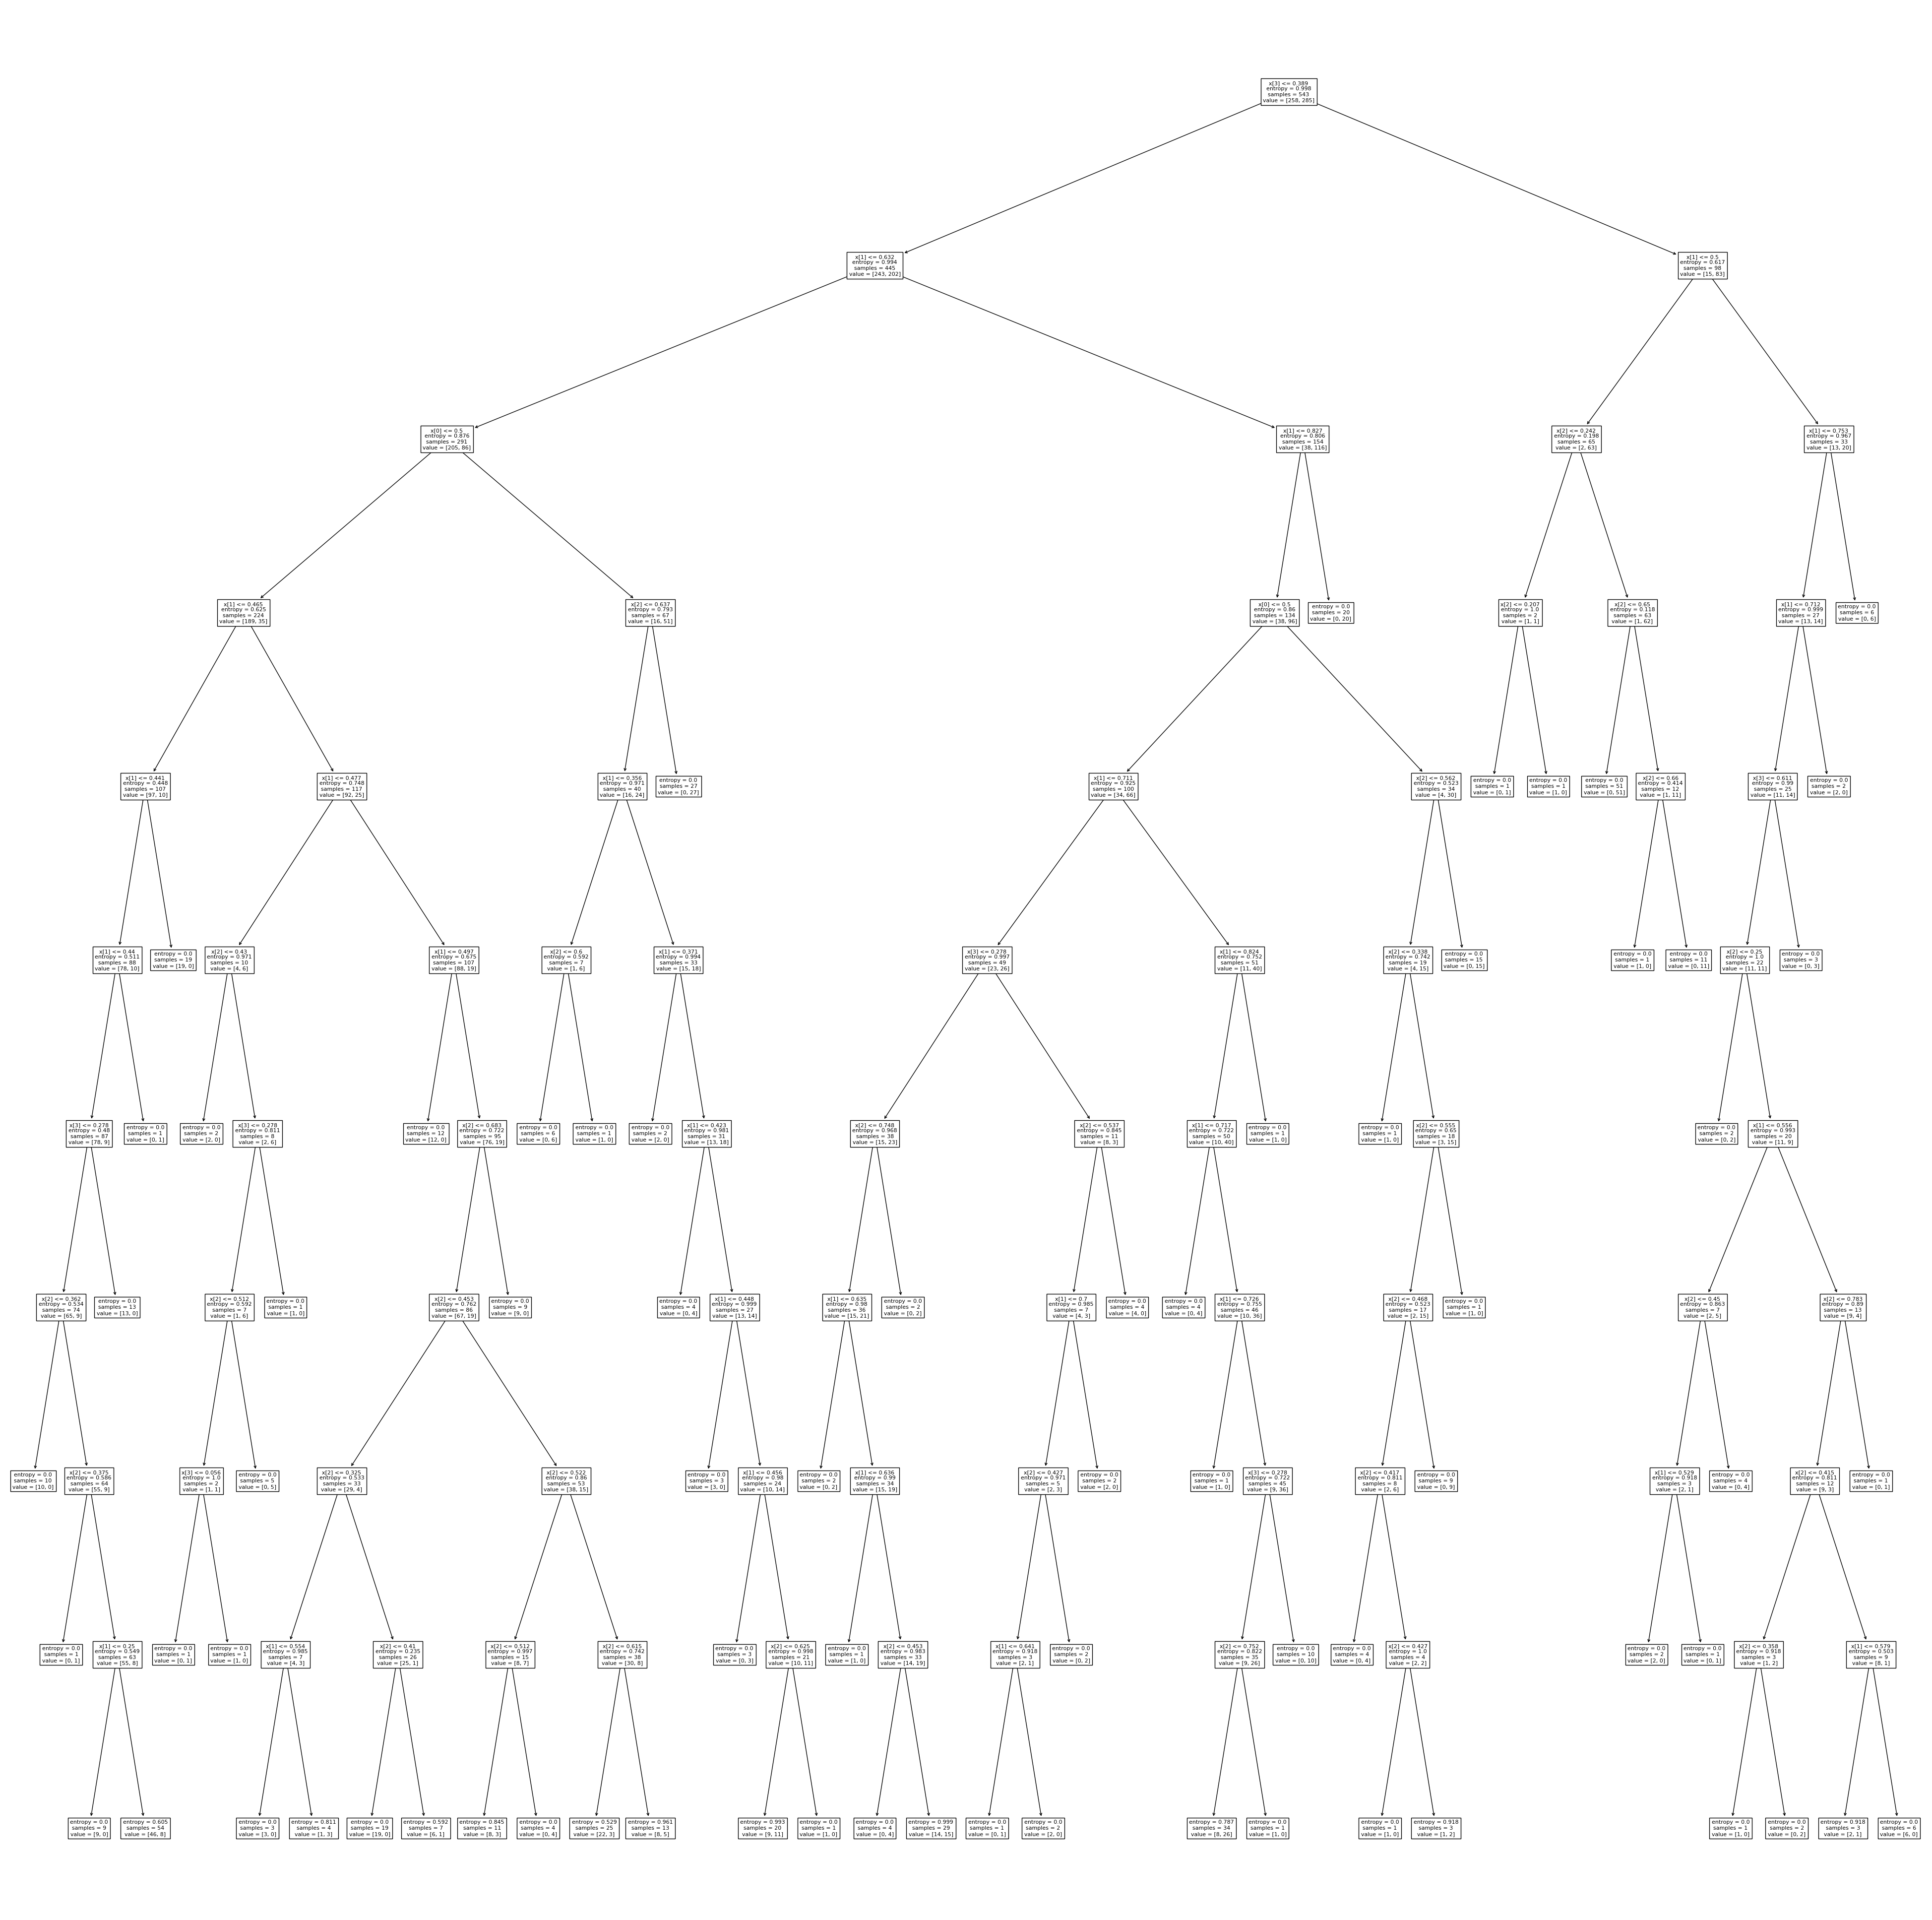

In [160]:
plt.figure(figsize=(50, 50))
tree.plot_tree(tree_clf) 

In [161]:
print('Algorithm:', type(tree_clf).__name__)
print("\nClassification report:\n", sklearn.metrics.classification_report(test_y, predictions))

DT= sklearn.metrics.accuracy_score(test_y, predictions)
print("Accuracy Score:", DT)

Algorithm: DecisionTreeClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       130
           1       0.44      1.00      0.61       103

    accuracy                           0.44       233
   macro avg       0.22      0.50      0.31       233
weighted avg       0.20      0.44      0.27       233

Accuracy Score: 0.44206008583690987


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## KNN Pipline

#### Intialize the Pipline

In [162]:
from sklearn.neighbors import KNeighborsClassifier

In [163]:
model2 = KNeighborsClassifier()
k_parm = {'n_neighbors':list(range(0, 10, 1))}
best_param = best_param(model2, k_parm)
print(best_param)

{'n_neighbors': 9}


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 213, in fit
    self._validate_params()
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\lib\site-packages\sk

In [164]:
KNN_Pipline=Pipeline([
    ("scaler", MinMaxScaler()), #transformer
    ("model",KNeighborsClassifier(n_neighbors=3)) #estimator
])

## train the model

In [165]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#k_range = list(range(1, 40))


#param_grid = {'n_neighbors': k_range}
  
# defining parameter range
#grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=KNN_Pipline.fit(X_train_reduced, train_y)
grid_search

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', KNeighborsClassifier(n_neighbors=3))])

#### Prediction 

In [166]:
KNN_y_pred=KNN_Pipline.predict(X_test_reduced)

#### Model Evaluation

In [167]:
#calculate the accuaracy
KNN_accuracy=accuracy_score(test_y,KNN_y_pred)
KNN_accuracy

print('Accuracy:', KNN_accuracy)

Accuracy: 0.7639484978540773


### Accuracy Compare

In [168]:
Acc_Com= {'Logistic Regression':[LR], 'Decision Tree classifier Accuracy':[DT], 'KNN Accuracy':[KNN_accuracy]}

In [169]:
Acc_Com = pd.DataFrame(Acc_Com)

In [170]:
Acc_Com

,Logistic Regression,Decision Tree classifier Accuracy,KNN Accuracy
0,0.44206,0.44206,0.763948


# Prediction by the model

In [171]:
#features= df[['International plan', 'Total day minutes', 'Total intl minutes', 'Customer service calls']]

input_ = np.array([1, 300.0, 11.0, 5])
input_array = np.reshape(input_, (1, -1))

print(KNN_Pipline.predict(input_array))

if np.any(input_array == 1):
    print("True , the customer has churne, means that the a customer will cancel their service with your company ")
elif np.any(input_array == 0):
    print("False , the customer has not churne, means that the a customer will not cancel their service with your company ")
else:
    print("there is an error")
    



[1]
True , the customer has churne, means that the a customer will cancel their service with your company 
